In [1]:
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [10]:
def get_performance(y_real, y_predict, description):

    row = [
        description,
        r2_score(y_true=y_real, y_pred=y_predict),
        root_mean_squared_error(y_true=y_real, y_pred=y_predict),
        mean_absolute_error(y_true=y_real, y_pred=y_predict)
    ]

    return row

In [4]:
df_data = pd.read_csv("../clustering_examples/estimated_properties.csv")
df_data.head()

,sequence,Activity,MW,isoelectric_point,aromaticity,aliphatic_index,boman_index,charge,charge_density,hydrophobic_ratio,instability_index
0,KKKKVVEATYVLV,1,1503.88,10.7646,0.0769,126.9231,0.6792,3.996,0.00266,0.4615,2.7000
1,GLPVCGESCFGGSCYTPGCSCTWPICTRD,1,2999.44,5.8203,0.1034,36.8966,0.5838,-0.408,-0.00014,0.3448,79.3310
2,MQYKINMYAIVVYDVNVSRQNQIREFLRKYLYHVQRSVFEGEISPS...,1,10913.64,8.9775,0.1319,108.0220,1.5576,2.028,0.00019,0.3846,60.4879
3,KQEGRDHDKSKGHFHMIVIHHKGGQAHHG,1,3308.67,10.6753,0.0345,40.3448,2.8534,3.689,0.00111,0.2069,19.3345
4,LAHKSRLYERHM,1,1539.81,11.2881,0.0833,73.3333,3.4217,3.194,0.00207,0.3333,47.6417


In [16]:
df_data.describe()

,Activity,MW,isoelectric_point,aromaticity,aliphatic_index,boman_index,charge,charge_density,hydrophobic_ratio,instability_index
count,10354.000000,10354.000000,10354.000000,10354.000000,10354.000000,10354.000000,10354.000000,10354.000000,10354.000000,10354.000000
mean,0.500000,3314.803821,9.441646,0.098094,83.540377,1.475537,2.534111,0.001112,0.393441,44.359226
std,0.500024,2877.547677,2.987183,0.093961,45.743968,1.818802,3.671602,0.001471,0.147996,44.953958
min,0.000000,171.200000,2.809600,0.000000,0.000000,-4.920000,-22.936000,-0.007070,0.000000,-71.733300
25%,0.000000,1537.650000,7.429700,0.035700,52.694900,0.355450,0.098000,0.000050,0.314300,17.107925
50%,0.500000,2333.610000,9.979500,0.076900,81.666700,1.430850,1.996000,0.000935,0.394700,38.707500
75%,1.000000,4031.770000,11.850125,0.133300,111.379300,2.365700,4.859000,0.001870,0.482700,61.618200
max,1.000000,17715.050000,14.255900,1.000000,390.000000,14.920000,28.783000,0.009940,1.000000,524.520000


In [17]:
import seaborn as sns

<Axes: xlabel='boman_index', ylabel='Count'>

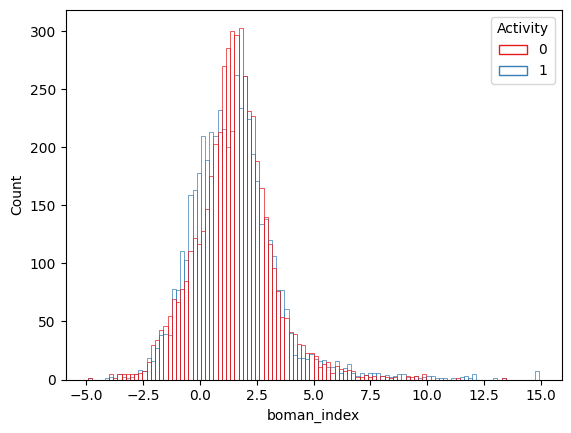

In [18]:
sns.histplot(data=df_data, x="boman_index", hue="Activity", fill=False, palette="Set1")

In [5]:
df_values = df_data.drop(columns=["sequence", "Activity", "boman_index"])
response = df_data["boman_index"].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_values, response, test_size=.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=42)

In [8]:
adaboost_instance = AdaBoostRegressor(random_state=42).fit(X=X_train, y=y_train)
rf_instance = RandomForestRegressor(random_state=42).fit(X=X_train, y=y_train)
svc_instance = SVR().fit(X=X_train, y=y_train)
dt_instance = DecisionTreeRegressor().fit(X=X_train, y=y_train)
lgbm_instance = LGBMRegressor().fit(X=X_train, y=y_train)
xgboost_instance = XGBRegressor().fit(X=X_train, y=y_train)
laso_instance = Lasso().fit(X=X_train, y=y_train)
ridge_instance = Ridge().fit(X=X_train, y=y_train)
elastic_instance = ElasticNet().fit(X=X_train, y=y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1995
[LightGBM] [Info] Number of data points in the train set: 6988, number of used features: 8
[LightGBM] [Info] Start training from score 1.478369


In [9]:
predictions_adaboost_val = adaboost_instance.predict(X_val)
predictions_rf_val = rf_instance.predict(X_val)
predictions_svc_val = svc_instance.predict(X_val)
predictions_dt_val = dt_instance.predict(X_val)
predictions_lgbm_val = lgbm_instance.predict(X_val)
predictions_xgboost_val = xgboost_instance.predict(X_val)
predictions_laso_val = laso_instance.predict(X_val)
predictions_ridge_val = ridge_instance.predict(X_val)
predictions_elastic_val = elastic_instance.predict(X_val)

In [13]:
predictions_adaboost_test = adaboost_instance.predict(X_test)
predictions_rf_test = rf_instance.predict(X_test)
predictions_svc_test = svc_instance.predict(X_test)
predictions_dt_test = dt_instance.predict(X_test)
predictions_lgbm_test = lgbm_instance.predict(X_test)
predictions_xgboost_test = xgboost_instance.predict(X_test)
predictions_laso_test = laso_instance.predict(X_test)
predictions_ridge_test = ridge_instance.predict(X_test)
predictions_elastic_test = elastic_instance.predict(X_test)

In [11]:
matrix_performances = [
    get_performance(y_val, predictions_adaboost_val, "Adaboost"),
    get_performance(y_val, predictions_rf_val, "RF"),
    get_performance(y_val, predictions_svc_val, "SVC"),
    get_performance(y_val, predictions_dt_val, "DT"),
    get_performance(y_val, predictions_lgbm_val, "LGBM"),
    get_performance(y_val, predictions_xgboost_val, "XGBoost"),
    get_performance(y_val, predictions_laso_val, "Lasso"),
    get_performance(y_val, predictions_ridge_val, "Ridge"),
    get_performance(y_val, predictions_elastic_val, "Elastic")
]

df_performance = pd.DataFrame(data=matrix_performances, columns=["descriptor", "r2", "rmse", "mae"])

In [ ]:
df_performance

,descriptor,r2,rmse,mae
0,Adaboost,0.642022,1.110325,0.889681
1,RF,0.826353,0.773313,0.548319
2,SVC,0.321117,1.529042,1.081616
3,DT,0.634186,1.122411,0.770635
4,LGBM,0.842429,0.736648,0.539327
5,XGBoost,0.840677,0.740731,0.530644
6,Lasso,0.493270,1.321023,0.992985
7,Ridge,0.670377,1.065444,0.787563
8,Elastic,0.508212,1.301401,0.983389


In [14]:
matrix_performances = [
    get_performance(y_test, predictions_adaboost_test, "Adaboost"),
    get_performance(y_test, predictions_rf_test, "RF"),
    get_performance(y_test, predictions_svc_test, "SVC"),
    get_performance(y_test, predictions_dt_test, "DT"),
    get_performance(y_test, predictions_lgbm_test, "LGBM"),
    get_performance(y_test, predictions_xgboost_test, "XGBoost"),
    get_performance(y_test, predictions_laso_test, "Lasso"),
    get_performance(y_test, predictions_ridge_test, "Ridge"),
    get_performance(y_test, predictions_elastic_test, "Elastic")
]

df_performance_test = pd.DataFrame(data=matrix_performances, columns=["descriptor", "r2", "rmse", "mae"])

In [19]:
df_performance.columns = ['descriptor', 'r2_val', 'rmse_val', 'mae_val']
df_performance_test.columns = ['descriptor', 'r2_test', 'rmse_test', 'mae_test']

df_performance_test = df_performance_test.merge(right=df_performance, on="descriptor")
df_performance_test

,descriptor,r2_test,rmse_test,mae_test,r2_val,rmse_val,mae_val
0,Adaboost,0.670264,1.099503,0.878566,0.642022,1.110325,0.889681
1,RF,0.847920,0.746705,0.529387,0.826353,0.773313,0.548319
2,SVC,0.307895,1.592939,1.118964,0.321117,1.529042,1.081616
3,DT,0.662591,1.112222,0.780224,0.634186,1.122411,0.770635
4,LGBM,0.850584,0.740135,0.549821,0.842429,0.736648,0.539327
5,XGBoost,0.855389,0.728137,0.528673,0.840677,0.740731,0.530644
6,Lasso,0.496526,1.358631,1.036135,0.493270,1.321023,0.992985
7,Ridge,0.681147,1.081206,0.811229,0.670377,1.065444,0.787563
8,Elastic,0.513516,1.335512,1.023629,0.508212,1.301401,0.983389
